In [75]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [76]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print(data.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [77]:
print(test.columns)

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)


In [78]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(data.drop(['label'],axis='columns'),data.label,train_size=0.99)

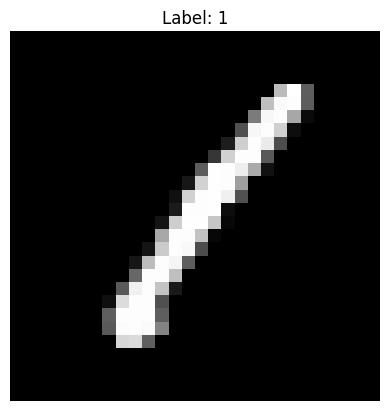

In [79]:
image_data = data.iloc[0, 1:].values  # Extract pixel values (ignore label)
image_label = data.iloc[0, 0]  # Extract label

# Reshape the 1D array into a 2D 28x28 image
image_data = image_data.reshape(28, 28)

# Display the image
plt.imshow(image_data, cmap='gray')  # Use grayscale colormap
plt.title(f"Label: {image_label}")  # Show the label as the title
plt.axis("off")  # Hide axis
plt.show()


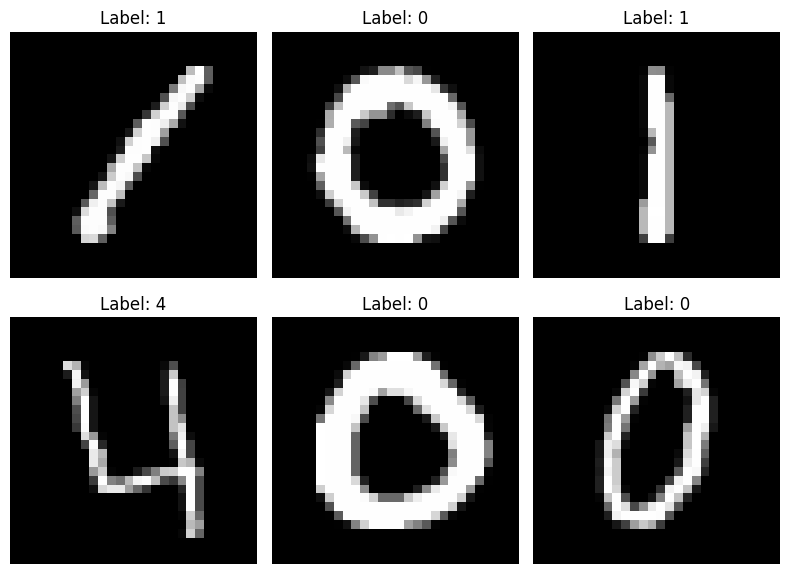

In [80]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))

# Loop through the first 6 images
for i, ax in enumerate(axes.flat):
    image_data = data.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    label = data.iloc[i, 0]  # Get the label

    ax.imshow(image_data, cmap='gray')  # Display image
    ax.set_title(f"Label: {label}")  # Set title
    ax.axis("off")  # Hide axis

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [81]:
xTest=xTest/255
xTrain=xTrain/255

model = keras.Sequential([
    keras.layers.Dense(500,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
model.fit(xTrain,yTrain,epochs=10)

Epoch 1/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8829 - loss: 0.3910
Epoch 2/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9696 - loss: 0.0997
Epoch 3/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9832 - loss: 0.0575
Epoch 4/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9884 - loss: 0.0390
Epoch 5/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9928 - loss: 0.0244
Epoch 6/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9937 - loss: 0.0210
Epoch 7/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9961 - loss: 0.0130
Epoch 8/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9964 - loss: 0.0126
Epoch 9/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9969 - loss: 0.0095
Epoch 10/10
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9981 - loss: 0.0070


In [83]:
model.evaluate(xTest,yTest)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9763 - loss: 0.1087 


[0.11353367567062378, 0.973809540271759]

In [84]:
sub = pd.read_csv("sample_submission.csv")
sub.head(10)

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [85]:
preds = model.predict(test)
Predicted_labels=[np.argmax(i) for i in preds]
df=pd.DataFrame({
    "ImageId":sub.ImageId,
    "Label":Predicted_labels
})

df.head(10)


875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 588us/step


,ImageId,Label
0,1,2
1,2,0
2,3,8
3,4,0
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [86]:
df.to_csv("submission.csv", index=False)